In [10]:
#problem 2 final#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
#
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor



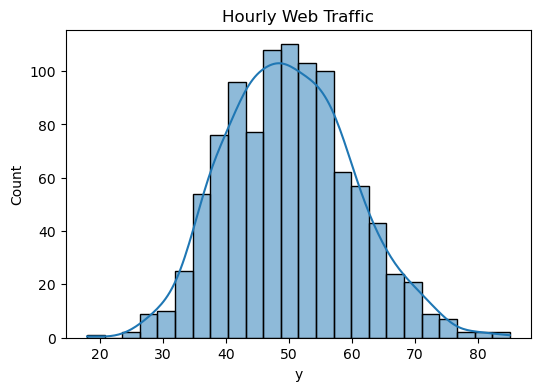

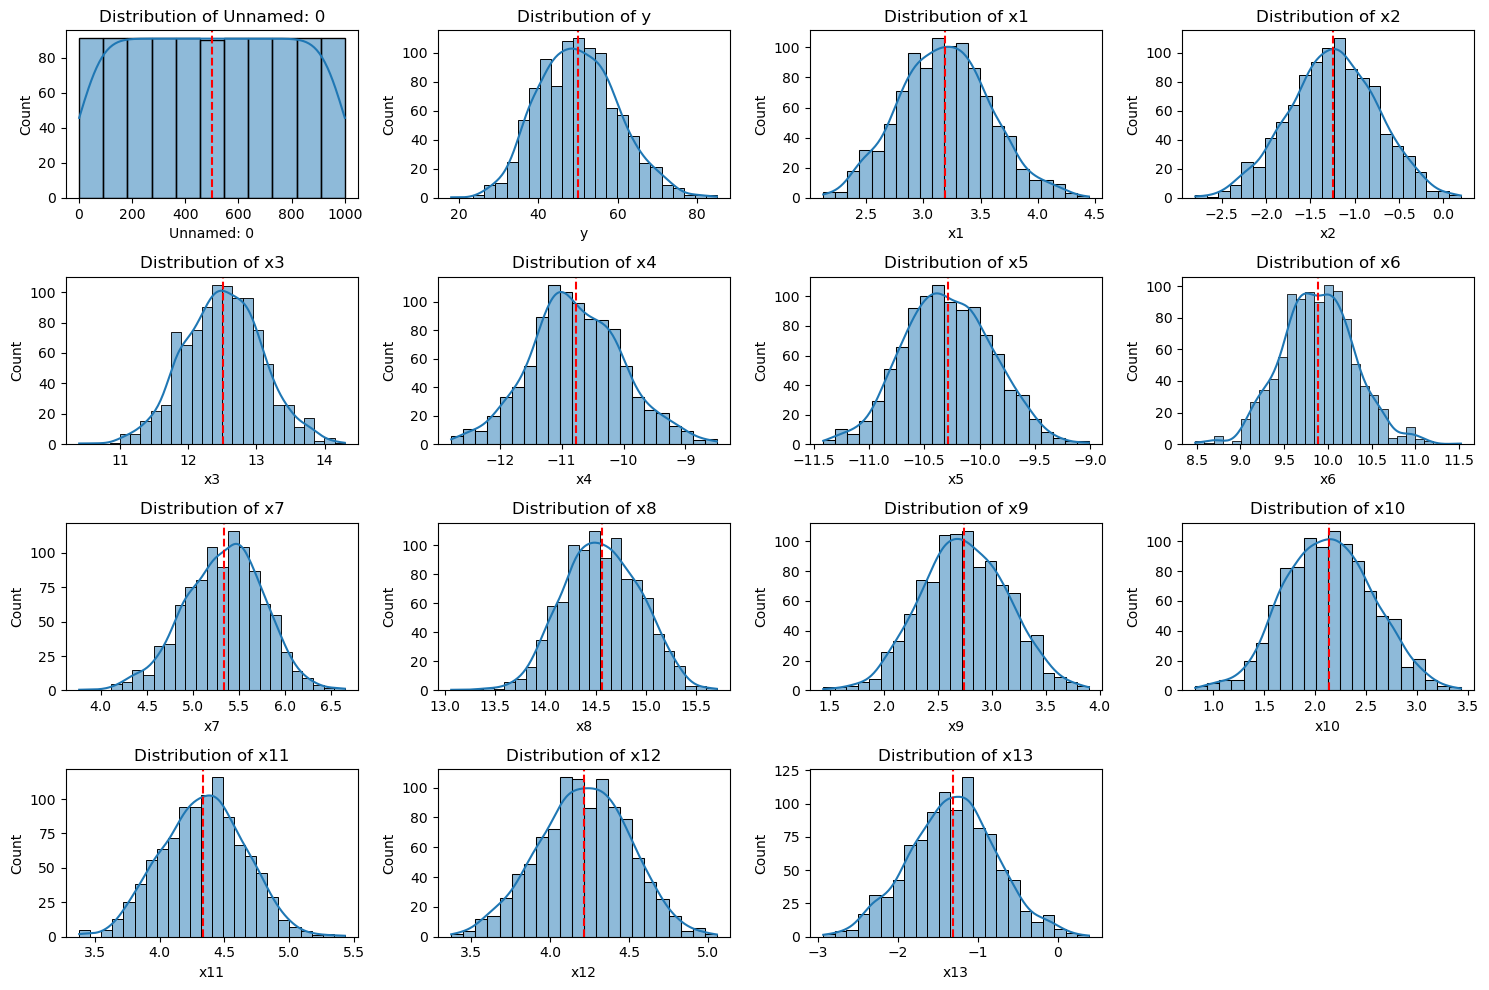

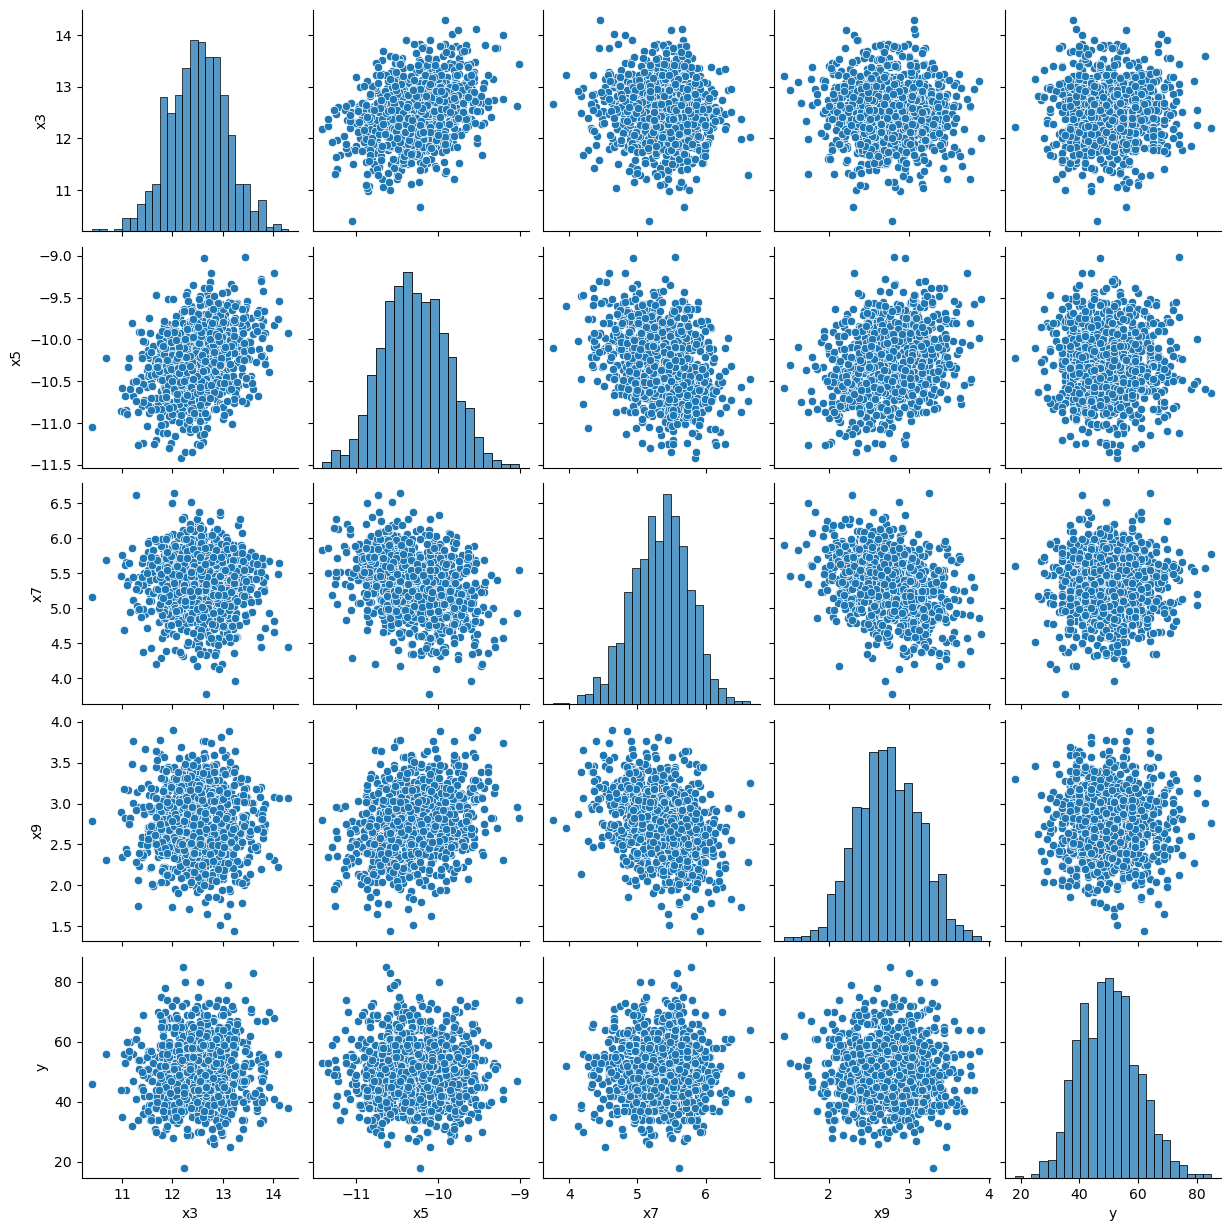

50.055 10.00220070879498


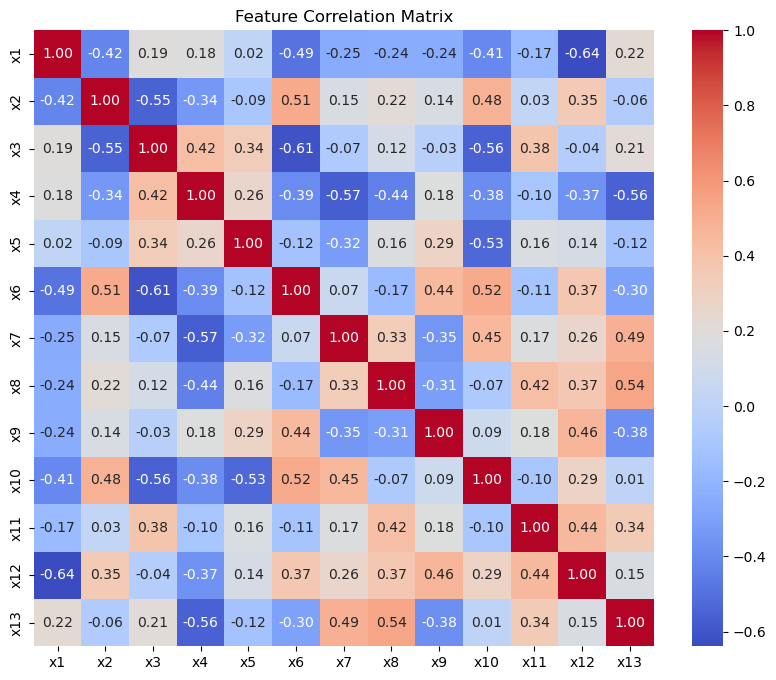

In [11]:
### PLOTS ### for ### EDA ###
df = pd.read_csv('./midterm_data/data_midterm_problem2.csv')

#
x = df.drop(['y', 'Unnamed: 0'], axis = 1)
y = df['y']
# 
#print(df.describe())
#print(df.isnull().sum())

# CHECK DISTRIBUTION OF Y
plt.figure(figsize=(6, 4))
sns.histplot(df['y'], kde=True)
plt.title('Hourly Web Traffic')
plt.show()

# Plot the distribution of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    mean_value = df[column].mean()

    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between X1, X2, and y
sns.pairplot(df[['x3', 'x5', 'x7', 'x9', 'y']])
plt.show()

meany = df['y'].mean()
sdy = df['y'].std()
print (meany, sdy)

#correlation matrix
corr_matrix = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

Best alpha: 93.26033468832199
Mean Squared Error with optimized alpha: 120.27901162232247


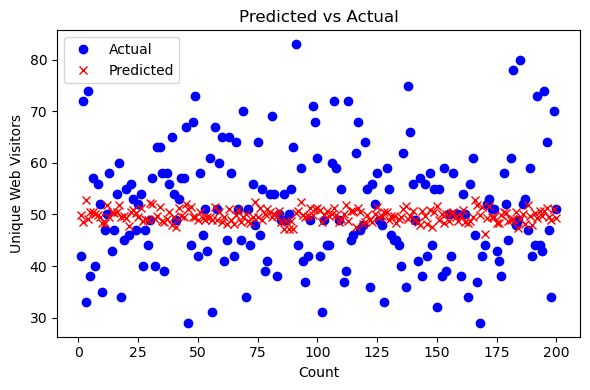

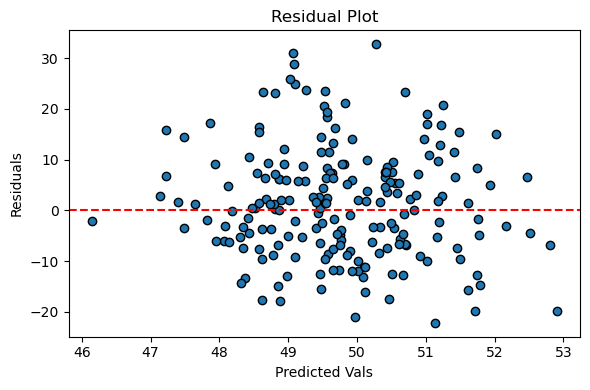

[-0.17874943  0.76726204  0.53162653  0.97095242 -0.69468313  0.4610476
  0.5684348  -0.47965073 -0.35797829 -0.9247835  -0.65377264  0.45402779
  0.28903835]


In [12]:
## let us RETURN to ridge regression ## 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# split and standardize for ridge
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# init params and model
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
# update paramgrid
param_grid = {'alpha': np.logspace(-5, 5, 100)} 
# increase max iter to attmept to redeem underfit
ridge_cv = Ridge(max_iter=100000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_cv, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

#
ridge_1 = Ridge(alpha=best_alpha, max_iter=100000)
ridge_1.fit(X_train_scaled, y_train)

# 
y_pred_best = ridge_1.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with optimized alpha: {mse_best}')


## plotting
# index test data for plotting
index_test = range(1, len(y_test) + 1)

# plot predictions vs test vals
plt.figure(figsize=(6, 4))
plt.plot(index_test, y_test, label='Actual', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_best, label='Predicted', color='red', marker='x', linestyle='none')
plt.xlabel('Count')
plt.ylabel('Unique Web Visitors')
plt.title('Predicted vs Actual')
plt.legend()
plt.tight_layout()
plt.show()
# Calculate residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best, residuals, edgecolors=(0, 0, 0))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Vals')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# see what is up
coefs = ridge_1.coef_
print(coefs)


## Problem 2 Explanation ##
The goal of this problem was to identify which of the 13 input features were most important for the prediction of the target variable y, hourly web traffic in terms of unique visitors. Thus, the problem is feature selection with 13 inputs that should be ranked according to their importance. After exploratory data analysis and pairwise plotting, it became clear that each of these variables including the target variable $y$ were very similar normal distributions. This presents a challenge in that given this information about y, none of the input features are likely to hold much leverage in its value. To test this, I fit ridge, lasso, and elasticNet, and bayesian ridge regression models in an attempt to identify the best measurement of feature influence on web traffic. After running a cross-validated ridge regression model with a relatively wide parameter search for the alpha parameter, I was able to conclude that the 3 most influential features were x4, x10, and x2 with coefficients of 0.971, -0.925, and 0.767 respectively. However, what I would interpret from this dataset is that none of the provided 13 features do a particularly good job in explaining the number of unique visitors in a 1 hour period. After regularized regression with cross validation, none of these features have a coefficient with a magnitude >1. The number of unique visitors is best described as a gaussian random variable.